# Exploring neighbourhoods of Staten Island of New York City to open a restaurant

## Introduction

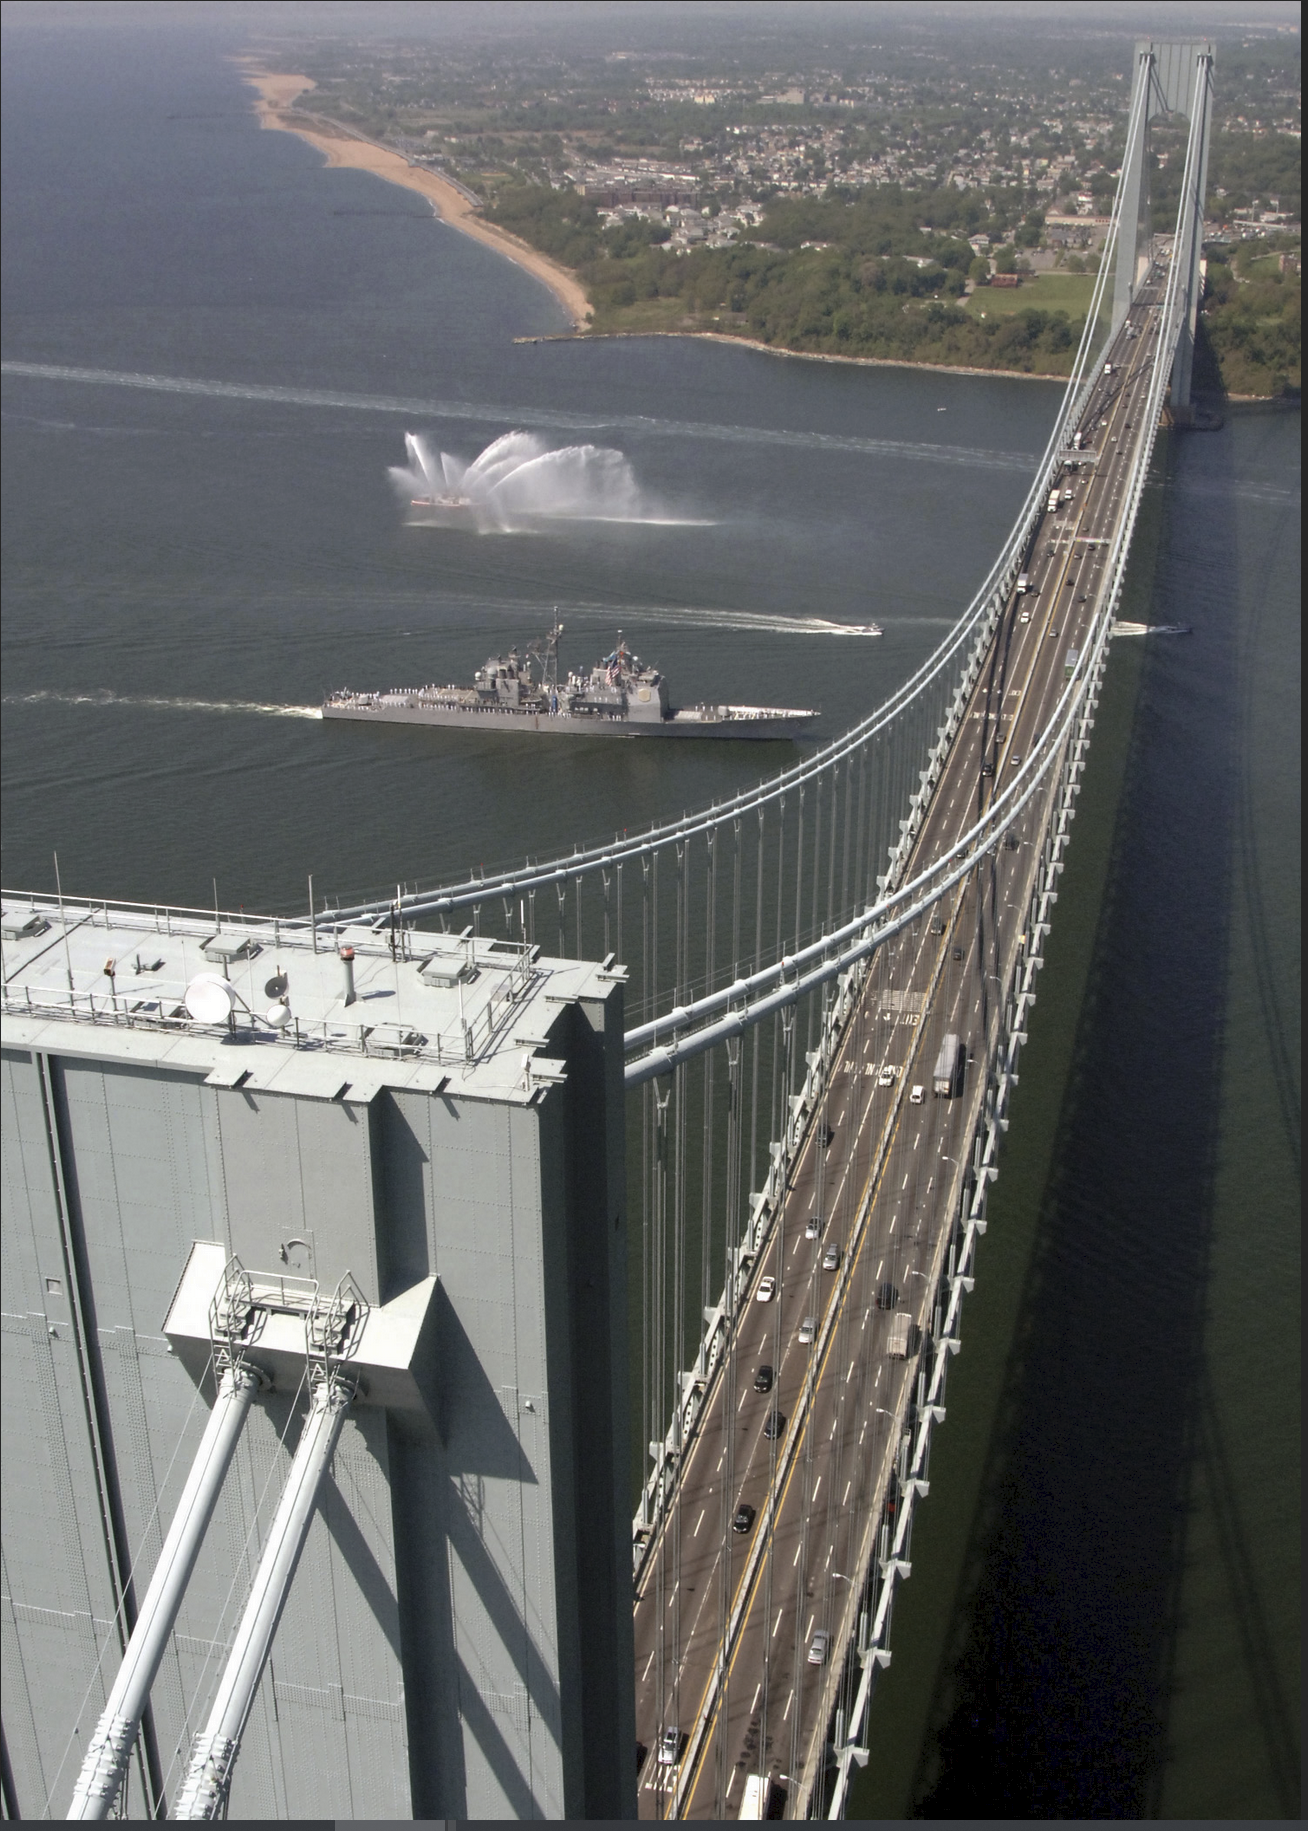

New York City (NYC), is the most populous city in the United States. With an estimated 2019 population of 8,336,817 distributed over about 302.6 square miles (784 km2), New York is also the most densely populated major city in the United States. The city is the center of the New York metropolitan area, the largest metropolitan area in the world by urban landmass. With almost 20 million people in its metropolitan statistical area and approximately 23 million in its combined statistical area, it is one of the world's most populous megacities.

Staten Island of New York City is the least populated of the 5 boroughs of New York City with an estimated population of 476,143 in 2019, but is the third-largest in land area at 58.5 sq mi (152 km2).

## Problem

In such a large borough with least population, finding a suitable location to open a restaurent is a daunting task. In this project, we will explore neighbourhoods of Staten Island and find which cuisines are popular in each neighbourhood, understand its demographic trends.

This analysis can be used to find a suitable neighbourhood for a restaurant. Additionally, this can also be used by a tourist travelling to Staten Island, New York City to visit neighbourhoods he/she prefers or a family looking forward to move to Staten Island, New York City and could decide which neighbourhood is best suited for them.

## Data

## To understand and explore we will need the following

1. New York City has a total of 5 boroughs and 306 neighborhoods. In order to segment the neighborhoods and explore them, we will essentially need a dataset that contains the 5 boroughs and the neighborhoods that exist in each borough as well as the the latitude and logitude coordinates of each neighborhood.

   New York City Department of City Planning published this data at https://geo.nyu.edu/catalog/nyu_2451_34572


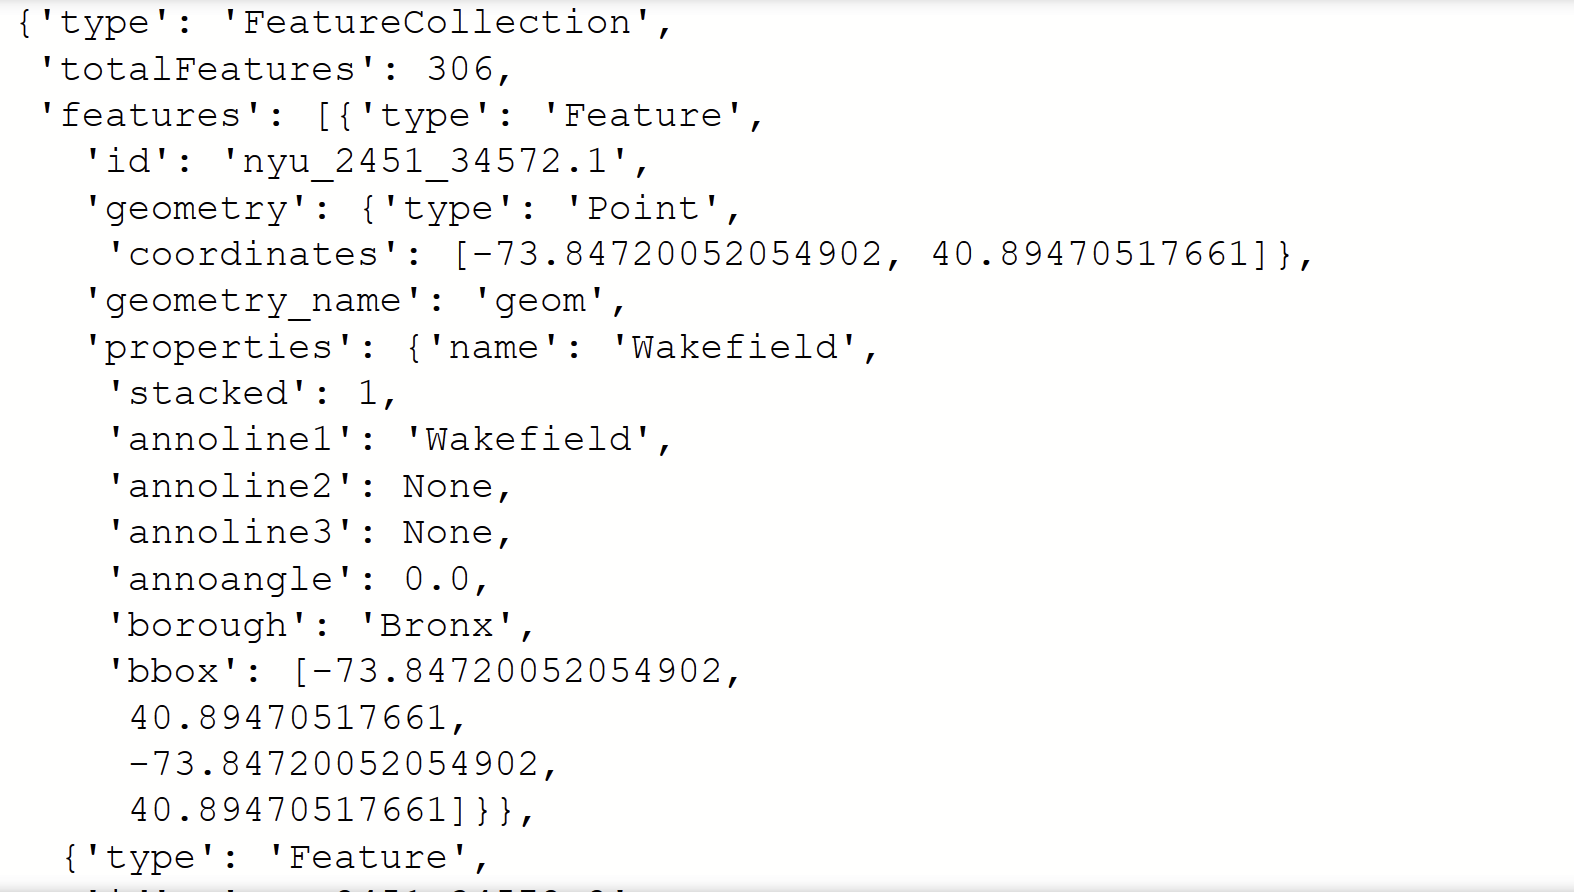

2. Foursquare Developers Access to venue data: https://foursquare.com/developers/apps
   
   Foursquare is a location data provider, which will be used to make RESTful API calls to retrieve data about  restaurents in different neighborhoods. 

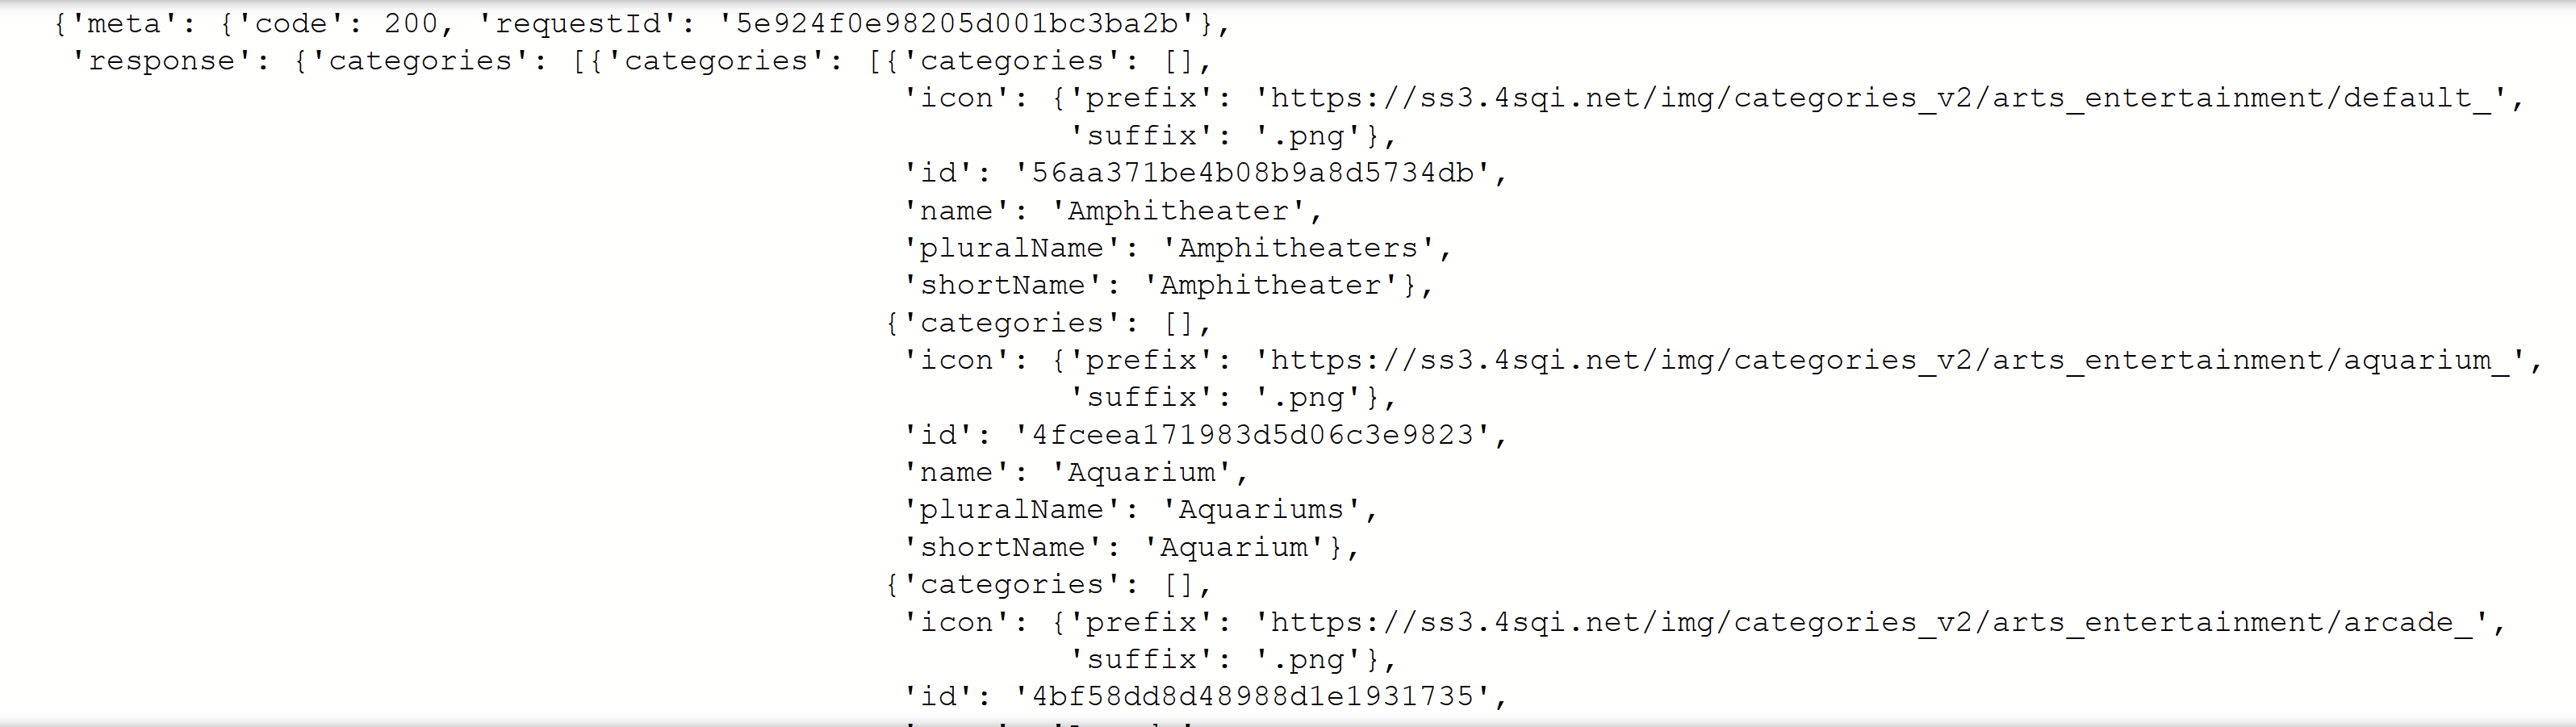

# Methodology

## Explore neighbourhoods of Staten Island using NYC dataset

Import all required libraries and download New York City dataset which contains alot of information about New York City. From this analyze and clean the data to pull data of borough, neighbourhoods, their latitude and longitude. This data exist in features dictionary, so transform it into pandas dataframe by looping trough the whole dataset to pull all required data. Once done, data will look like below.

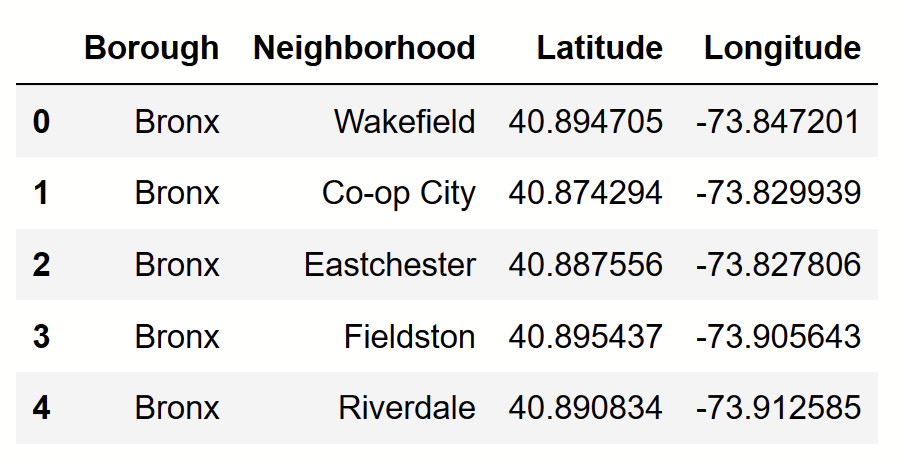

The dataframe consists 5 boroughs of New York City data but we are exploring only Staten Island, so strip the data to extract only Staten Island neighbourhoods. After this data will look like below.

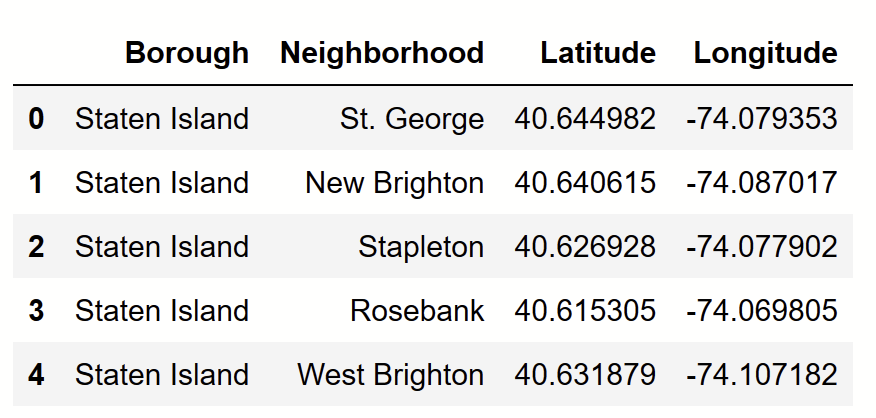

In [15]:
SI_neighborhoods.shape

(63, 4)

Use geopy library to get the latitude and longitude values of New York City

In [16]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="nyc_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(f"The geograpical coordinates of New York City are {latitude}, {longitude}.")

The geograpical coordinates of New York City are 40.7127281, -74.0060152.


Create a map of New York City with Staten Island neighborhoods superimposed on top

In [17]:
# create map of New York City using latitude and longitude values
map_nyc = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(SI_neighborhoods['Latitude'], SI_neighborhoods['Longitude'], SI_neighborhoods['Borough'], SI_neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_nyc)  
    
map_nyc

Feel free to zoom into the above map, and click on each circle mark to reveal the name of the neighborhood and its respective borough.

Define Foursquare Credentials and Version

In [18]:
CLIENT_ID = 'EPGMBXZ5TDS4J3CTQTAXIP5DSIAMYSAPWFZ5D2DBKJQU2XR0' # your Foursquare ID
CLIENT_SECRET = 'ECFCR3CNIGXJEYCWHZ1X2L30XJOJFNW3VIULS4W3N5LBULNY' # your Foursquare Secret
VERSION = '20200409' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: EPGMBXZ5TDS4J3CTQTAXIP5DSIAMYSAPWFZ5D2DBKJQU2XR0
CLIENT_SECRET:ECFCR3CNIGXJEYCWHZ1X2L30XJOJFNW3VIULS4W3N5LBULNY


Fetch Foursquare Venue Category Hierarchy

In [20]:
url = 'https://api.foursquare.com/v2/venues/categories?&client_id={}&client_secret={}&v={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION)
category_results = requests.get(url).json()

In [22]:
pprint(category_results)

{'meta': {'code': 200, 'requestId': '5e924f0e98205d001bc3ba2b'},
 'response': {'categories': [{'categories': [{'categories': [],
                                              'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/default_',
                                                       'suffix': '.png'},
                                              'id': '56aa371be4b08b9a8d5734db',
                                              'name': 'Amphitheater',
                                              'pluralName': 'Amphitheaters',
                                              'shortName': 'Amphitheater'},
                                             {'categories': [],
                                              'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/aquarium_',
                                                       'suffix': '.png'},
                                              'id': '4fceea171983d5d06c3e9823',
     

                                                                              'pluralName': 'Shandong '
                                                                                            'Restaurants',
                                                                              'shortName': 'Shandong'},
                                                                             {'categories': [],
                                                                              'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/asian_',
                                                                                       'suffix': '.png'},
                                                                              'id': '52af3b593cf9994f4e043c00',
                                                                              'name': 'Shanghai '
                                                                                      'Restaurant',
                      

                                                              'shortName': 'Roman'},
                                                             {'categories': [],
                                                              'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_',
                                                                       'suffix': '.png'},
                                                              'id': '55a5a1ebe4b013909087cb8f',
                                                              'name': 'Sardinian '
                                                                      'Restaurant',
                                                              'pluralName': 'Sardinian '
                                                                            'Restaurants',
                                                              'shortName': 'Sardinian'},
                                                             {'categories': 

                                                       'suffix': '.png'},
                                              'id': '4bf58dd8d48988d15a941735',
                                              'name': 'Garden',
                                              'pluralName': 'Gardens',
                                              'shortName': 'Garden'},
                                             {'categories': [],
                                              'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/gun_',
                                                       'suffix': '.png'},
                                              'id': '52e81612bcbc57f1066b7a11',
                                              'name': 'Gun Range',
                                              'pluralName': 'Gun Ranges',
                                              'shortName': 'Gun Range'},
                                             {'categories': [],
                  

                                                             {'categories': [],
                                                              'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/apparel_men_',
                                                                       'suffix': '.png'},
                                                              'id': '4bf58dd8d48988d106951735',
                                                              'name': "Men's "
                                                                      'Store',
                                                              'pluralName': "Men's "
                                                                            'Stores',
                                                              'shortName': "Men's "
                                                                           'Store'},
                                                             {'categories': [],
              

In [24]:
category_list = category_results['response']['categories']
pprint(category_list)

[{'categories': [{'categories': [],
                  'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/default_',
                           'suffix': '.png'},
                  'id': '56aa371be4b08b9a8d5734db',
                  'name': 'Amphitheater',
                  'pluralName': 'Amphitheaters',
                  'shortName': 'Amphitheater'},
                 {'categories': [],
                  'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/aquarium_',
                           'suffix': '.png'},
                  'id': '4fceea171983d5d06c3e9823',
                  'name': 'Aquarium',
                  'pluralName': 'Aquariums',
                  'shortName': 'Aquarium'},
                 {'categories': [],
                  'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/arcade_',
                           'suffix': '.png'},
                  'id': '4bf58dd8d48988d1e1931735',
           

                                  'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/japanese_',
                                           'suffix': '.png'},
                                  'id': '4bf58dd8d48988d111941735',
                                  'name': 'Japanese Restaurant',
                                  'pluralName': 'Japanese Restaurants',
                                  'shortName': 'Japanese'},
                                 {'categories': [{'categories': [],
                                                  'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/korean_',
                                                           'suffix': '.png'},
                                                  'id': '56aa371be4b08b9a8d5734e4',
                                                  'name': 'Bossam/Jokbal '
                                                          'Restaurant',
                                                  'pluralName'

                                 {'categories': [],
                                  'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/burrito_',
                                           'suffix': '.png'},
                                  'id': '4bf58dd8d48988d153941735',
                                  'name': 'Burrito Place',
                                  'pluralName': 'Burrito Places',
                                  'shortName': 'Burritos'},
                                 {'categories': [],
                                  'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/taco_',
                                           'suffix': '.png'},
                                  'id': '4bf58dd8d48988d151941735',
                                  'name': 'Taco Place',
                                  'pluralName': 'Taco Places',
                                  'shortName': 'Tacos'},
                                 {'categories': [],
        

                  'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/government_',
                           'suffix': '.png'},
                  'id': '4bf58dd8d48988d126941735',
                  'name': 'Government Building',
                  'pluralName': 'Government Buildings',
                  'shortName': 'Government'},
                 {'categories': [],
                  'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/default_',
                           'suffix': '.png'},
                  'id': '56aa371be4b08b9a8d5734d7',
                  'name': 'Industrial Estate',
                  'pluralName': 'Industrial Estates',
                  'shortName': 'Industrial Estate'},
                 {'categories': [],
                  'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/education/lab_',
                           'suffix': '.png'},
                  'id': '5744ccdfe4b0c0459246b4d6',
                  'name': 'Laboratory'

                 {'categories': [],
                  'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/education/lawschool_',
                           'suffix': '.png'},
                  'id': '5ae95d208a6f17002ce792b2',
                  'name': 'Notary',
                  'pluralName': 'Notaries',
                  'shortName': 'Notary'},
                 {'categories': [],
                  'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/medical_opticalshop_',
                           'suffix': '.png'},
                  'id': '4d954afda243a5684865b473',
                  'name': 'Optical Shop',
                  'pluralName': 'Optical Shops',
                  'shortName': 'Optical'},
                 {'categories': [],
                  'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/default_',
                           'suffix': '.png'},
                  'id': '52f2ab2ebcbc57f1066b8b2f',
                  'name': 'Other Repair

In [25]:
for data in category_list:
    print(data['id'], data['name'])

4d4b7104d754a06370d81259 Arts & Entertainment
4d4b7105d754a06372d81259 College & University
4d4b7105d754a06373d81259 Event
4d4b7105d754a06374d81259 Food
4d4b7105d754a06376d81259 Nightlife Spot
4d4b7105d754a06377d81259 Outdoors & Recreation
4d4b7105d754a06375d81259 Professional & Other Places
4e67e38e036454776db1fb3a Residence
4d4b7105d754a06378d81259 Shop & Service
4d4b7105d754a06379d81259 Travel & Transport


Note that food id is '4d4b7105d754a06374d81259'

In [26]:
# function to flatten a 'parent_id' category, returns all categories if checkParentID = False
def flatten_Hierarchy(category_list, checkParentID, category_dict, parent_id = ''):
    for data in category_list:
        
        if checkParentID == True and data['id'] == parent_id:
            category_dict[data['id']] = data['name']
            flatten_Hierarchy(category_list = data['categories'], checkParentID = False, category_dict = category_dict)
        
        elif checkParentID == False:
            category_dict[data['id']] = data['name']
            if len(data['categories']) != 0:
                flatten_Hierarchy(category_list = data['categories'], checkParentID = False, category_dict = category_dict)
    
    return category_dict

In [27]:
# this function takes the parent ID and returns 'name' and 'id' of all the sub-categories
category_dict = flatten_Hierarchy(category_list, checkParentID=True, category_dict = {}, parent_id = '4d4b7105d754a06374d81259')

pprint(category_dict)

{'4bf58dd8d48988d107941735': 'Argentinian Restaurant',
 '4bf58dd8d48988d108941735': 'Dumpling Restaurant',
 '4bf58dd8d48988d109941735': 'Eastern European Restaurant',
 '4bf58dd8d48988d10a941735': 'Ethiopian Restaurant',
 '4bf58dd8d48988d10b941735': 'Falafel Restaurant',
 '4bf58dd8d48988d10c941735': 'French Restaurant',
 '4bf58dd8d48988d10d941735': 'German Restaurant',
 '4bf58dd8d48988d10e941735': 'Greek Restaurant',
 '4bf58dd8d48988d10f941735': 'Indian Restaurant',
 '4bf58dd8d48988d110941735': 'Italian Restaurant',
 '4bf58dd8d48988d111941735': 'Japanese Restaurant',
 '4bf58dd8d48988d112941735': 'Juice Bar',
 '4bf58dd8d48988d113941735': 'Korean Restaurant',
 '4bf58dd8d48988d115941735': 'Middle Eastern Restaurant',
 '4bf58dd8d48988d120951735': 'Food Court',
 '4bf58dd8d48988d128941735': 'Cafeteria',
 '4bf58dd8d48988d142941735': 'Asian Restaurant',
 '4bf58dd8d48988d143941735': 'Breakfast Spot',
 '4bf58dd8d48988d144941735': 'Caribbean Restaurant',
 '4bf58dd8d48988d145941735': 'Chinese Resta

Now, we have all the categories in Food with their id's.

Explore the first neighborhood of Staten Island to understand the results of GET Request

Get the neighborhood's name.

In [28]:
SI_neighborhoods.loc[0, 'Neighborhood']

'St. George'

Get the neighborhood's latitude and longitude values.

In [29]:
neighborhood_latitude = SI_neighborhoods.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = SI_neighborhoods.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = SI_neighborhoods.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of St. George are 40.6449815710044, -74.07935312512797.


Now, let's get the Food that is in St. George within a radius of 400 meters.

First, let's create the GET request URL to search for Venue with requested Category ID

In [32]:
LIMIT = 1 # limit of number of venues returned by Foursquare API
radius = 400 # define radius
categoryId = '4d4b7105d754a06374d81259' # category ID for "Food"

# create URL

url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&categoryId={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius,
    categoryId,
    LIMIT)

results = requests.get(url).json()
pprint(results)

{'meta': {'code': 200, 'requestId': '5e925293d03993001b707d52'},
 'response': {'confident': False,
              'venues': [{'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/deli_',
                                                   'suffix': '.png'},
                                          'id': '4bf58dd8d48988d146941735',
                                          'name': 'Deli / Bodega',
                                          'pluralName': 'Delis / Bodegas',
                                          'primary': True,
                                          'shortName': 'Deli / Bodega'}],
                          'hasPerk': False,
                          'id': '4d41997c255d8cfac9ed7105',
                          'location': {'address': '19 Fort Pl',
                                       'cc': 'US',
                                       'city': 'New York',
                                       'country': 'United States',
                     

In [33]:
pprint(results['response']['venues'])

[{'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/deli_',
                           'suffix': '.png'},
                  'id': '4bf58dd8d48988d146941735',
                  'name': 'Deli / Bodega',
                  'pluralName': 'Delis / Bodegas',
                  'primary': True,
                  'shortName': 'Deli / Bodega'}],
  'hasPerk': False,
  'id': '4d41997c255d8cfac9ed7105',
  'location': {'address': '19 Fort Pl',
               'cc': 'US',
               'city': 'New York',
               'country': 'United States',
               'crossStreet': 'at Belmont Pl',
               'distance': 325,
               'formattedAddress': ['19 Fort Pl (at Belmont Pl)',
                                    'New York, NY 10301',
                                    'United States'],
               'labeledLatLngs': [{'label': 'display',
                                   'lat': 40.6420670896968,
                                   'lng': -74.07902687788008

Name of the food category is 'Deli / Bodega'

Create a function to repeat the above process to all the neighborhoods of Staten Island

In [35]:
def getNearbyFood(names, latitudes, longitudes, radius=400, LIMIT=100):
    not_found = 0
    print('***Start ', end='')
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(' .', end='')
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&categoryId={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius,
            "4d4b7105d754a06374d81259", # "Food" category id
            LIMIT)
            
        try:
            # make the GET request
            results = requests.get(url).json()['response']['venues']
            
            # return only relevant information for each nearby venue
            venues_list.append([(
                name, 
                lat, 
                lng, 
                v['name'], 
                v['location']['lat'], 
                v['location']['lng'],  
                v['categories'][0]['name']) for v in results])
        except:
            not_found += 1


    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    print(f"{not_found} venues with incompelete information.")
    return(nearby_venues)

To counter any redundant requests to the Foursquare API, use pickle to serialize the information retrieved from GET requests.

In [36]:
import pickle # to serialize and deserialize a Python object structure
try:
    with open('SI_food_venues.pkl', 'rb') as f:
        SI_venues = pickle.load(f)
    print("---Dataframe Existed and Deserialized---")
except:
    SI_venues = getNearbyFood(names=SI_neighborhoods['Neighborhood'],
                              latitudes=SI_neighborhoods['Latitude'],
                              longitudes=SI_neighborhoods['Longitude'])
    
    with open('SI_food_venues.pkl', 'wb') as f:
        pickle.dump(SI_venues, f)
    print("---Dataframe Created and Serialized---")

***Start  . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .0 venues with incompelete information.
---Dataframe Created and Serialized---


In [37]:
SI_venues.shape

(925, 7)

In [38]:
SI_venues.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0   St. George              40.644982              -74.079353   
1   St. George              40.644982              -74.079353   
2   St. George              40.644982              -74.079353   
3   St. George              40.644982              -74.079353   
4   St. George              40.644982              -74.079353   

                Venue  Venue Latitude  Venue Longitude        Venue Category  
0  Charmar Superrette       40.643971       -74.077482         Deli / Bodega  
1      Chang Noi Thai       40.643692       -74.077957       Thai Restaurant  
2        A&S Pizzeria       40.643940       -74.077626           Pizza Place  
3  The Burrito Shoppe       40.643639       -74.077919  Fast Food Restaurant  
4    The Salad Junkie       40.643868       -74.077656           Salad Place

Find how many unique categories can be curated from all the returned venues

In [39]:
print(f"There are {len(SI_venues['Venue Category'].unique())} uniques categories.")
SI_venues.groupby('Venue Category')['Venue Category'].count().sort_values(ascending=False)

There are 92 uniques categories.


Venue Category
Deli / Bodega                               126
Pizza Place                                 114
Italian Restaurant                           70
Chinese Restaurant                           41
Bagel Shop                                   41
Bakery                                       34
Mexican Restaurant                           33
Ice Cream Shop                               32
American Restaurant                          32
Food                                         31
Sandwich Place                               26
Café                                         23
Coffee Shop                                  22
Restaurant                                   21
Donut Shop                                   17
Sushi Restaurant                             16
Fast Food Restaurant                         15
Food Truck                                   12
Diner                                        12
Spanish Restaurant                           11
BBQ Joint                

Remove the generalized categories, like Restaurent, Food.

In [40]:
unique_categories = SI_venues['Venue Category'].unique().tolist()

# manually create a list of generalized categories
general_categories = ['Food','Café','Coffee Shop','Restaurant','Rock Club','Residential Building (Apartment / Condo)'
                      ,'Poke Place','Garden','German Restaurant','Gym / Fitness Center','Other Nightlife','Irish Pub'
                      ,'Snack Place','Event Space','Tea Room','Creperie','Cafeteria','Butcher']

food_categories =  list(set(unique_categories) - set(general_categories))

food_categories

['Dessert Shop',
 'Asian Restaurant',
 'Breakfast Spot',
 'Fast Food Restaurant',
 'Falafel Restaurant',
 'Cajun / Creole Restaurant',
 'Wings Joint',
 'Dim Sum Restaurant',
 'Indian Restaurant',
 'Middle Eastern Restaurant',
 'Gluten-free Restaurant',
 'Salad Place',
 'Donut Shop',
 'Southern / Soul Food Restaurant',
 'Comfort Food Restaurant',
 'Grocery Store',
 'Steakhouse',
 'Deli / Bodega',
 'Diner',
 'Vegetarian / Vegan Restaurant',
 'Vietnamese Restaurant',
 'Gastropub',
 'Empanada Restaurant',
 'Sandwich Place',
 'Hookah Bar',
 'Mexican Restaurant',
 'Taco Place',
 'Latin American Restaurant',
 'Theme Restaurant',
 'Caribbean Restaurant',
 'Filipino Restaurant',
 'Korean Restaurant',
 'Italian Restaurant',
 'French Restaurant',
 'Bistro',
 'Pizza Place',
 'Smoothie Shop',
 'Turkish Restaurant',
 'Burger Joint',
 'Ice Cream Shop',
 'Spanish Restaurant',
 'Juice Bar',
 'Chinese Restaurant',
 'Tapas Restaurant',
 'Convenience Store',
 'Tex-Mex Restaurant',
 'Mac & Cheese Joint',
 

In [41]:
SI_venues = SI_venues[SI_venues['Venue Category'].isin(food_categories)].reset_index()
print(SI_venues.shape)
SI_venues.head(5)

(814, 8)


index Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0      0   St. George              40.644982              -74.079353   
1      1   St. George              40.644982              -74.079353   
2      2   St. George              40.644982              -74.079353   
3      3   St. George              40.644982              -74.079353   
4      4   St. George              40.644982              -74.079353   

                Venue  Venue Latitude  Venue Longitude        Venue Category  
0  Charmar Superrette       40.643971       -74.077482         Deli / Bodega  
1      Chang Noi Thai       40.643692       -74.077957       Thai Restaurant  
2        A&S Pizzeria       40.643940       -74.077626           Pizza Place  
3  The Burrito Shoppe       40.643639       -74.077919  Fast Food Restaurant  
4    The Salad Junkie       40.643868       -74.077656           Salad Place

Analyze Each Neighborhood

In [42]:
# one hot encoding
SI_onehot = pd.get_dummies(SI_venues[['Venue Category']], prefix="", prefix_sep="")
SI_onehot.head()

African Restaurant  American Restaurant  Asian Restaurant  BBQ Joint  \
0                   0                    0                 0          0   
1                   0                    0                 0          0   
2                   0                    0                 0          0   
3                   0                    0                 0          0   
4                   0                    0                 0          0   

   Bagel Shop  Bakery  Bar  Bistro  Breakfast Spot  Bubble Tea Shop  \
0           0       0    0       0               0                0   
1           0       0    0       0               0                0   
2           0       0    0       0               0                0   
3           0       0    0       0               0                0   
4           0       0    0       0               0                0   

   Burger Joint  Burrito Place  Cajun / Creole Restaurant  \
0             0              0                          0   
1             0              0                          0   
2             0              0                          0   
3             0              0                          0   
4             0              0                          0   

   Caribbean Restaurant  Chinese Restaurant  Comfort Food Restaurant  \
0                     0                   0                        0   
1                     0                   0                        0   
2                     0                   0                        0   
3                     0                   0                        0   
4                     0                   0                        0   

   Convenience Store  Deli / Bodega  Dessert Shop  Dim Sum Restaurant  Diner  \
0                  0              1             0                   0      0   
1                  0              0             0                   0      0   
2                  0              0             0                   0      0   
3                  0              0             0                   0      0   
4                  0              0             0                   0      0   

   Donut Shop  Eastern European Restaurant  Empanada Restaurant  \
0           0                            0                    0   
1           0                            0                    0   
2           0                            0                    0   
3           0                            0                    0   
4           0                            0                    0   

   Falafel Restaurant  Fast Food Restaurant  Filipino Restaurant  \
0                   0                     0                    0   
1                   0                     0                    0   
2                   0                     0                    0   
3                   0                     1                    0   
4                   0                     0                    0   

   Fish & Chips Shop  Food Truck  French Restaurant  Fried Chicken Joint  \
0                  0           0                  0                    0   
1                  0           0                  0                    0   
2                  0           0                  0                    0   
3                  0           0                  0                    0   
4                  0           0                  0                    0   

   Frozen Yogurt Shop  Gastropub  Gluten-free Restaurant  Gourmet Shop  \
0                   0          0                       0             0   
1                   0          0                       0             0   
2                   0          0                       0             0   
3                   0          0                       0             0   
4                   0          0                       0             0   

   Greek Restaurant  Grocery Store  Halal Restaurant  Hookah Bar  \
0                 0              0                 0          

In [43]:
# add neighborhood column back to dataframe
SI_onehot['Neighborhood'] = SI_venues['Neighborhood'] 
SI_onehot.head()

African Restaurant  American Restaurant  Asian Restaurant  BBQ Joint  \
0                   0                    0                 0          0   
1                   0                    0                 0          0   
2                   0                    0                 0          0   
3                   0                    0                 0          0   
4                   0                    0                 0          0   

   Bagel Shop  Bakery  Bar  Bistro  Breakfast Spot  Bubble Tea Shop  \
0           0       0    0       0               0                0   
1           0       0    0       0               0                0   
2           0       0    0       0               0                0   
3           0       0    0       0               0                0   
4           0       0    0       0               0                0   

   Burger Joint  Burrito Place  Cajun / Creole Restaurant  \
0             0              0                          0   
1             0              0                          0   
2             0              0                          0   
3             0              0                          0   
4             0              0                          0   

   Caribbean Restaurant  Chinese Restaurant  Comfort Food Restaurant  \
0                     0                   0                        0   
1                     0                   0                        0   
2                     0                   0                        0   
3                     0                   0                        0   
4                     0                   0                        0   

   Convenience Store  Deli / Bodega  Dessert Shop  Dim Sum Restaurant  Diner  \
0                  0              1             0                   0      0   
1                  0              0             0                   0      0   
2                  0              0             0                   0      0   
3                  0              0             0                   0      0   
4                  0              0             0                   0      0   

   Donut Shop  Eastern European Restaurant  Empanada Restaurant  \
0           0                            0                    0   
1           0                            0                    0   
2           0                            0                    0   
3           0                            0                    0   
4           0                            0                    0   

   Falafel Restaurant  Fast Food Restaurant  Filipino Restaurant  \
0                   0                     0                    0   
1                   0                     0                    0   
2                   0                     0                    0   
3                   0                     1                    0   
4                   0                     0                    0   

   Fish & Chips Shop  Food Truck  French Restaurant  Fried Chicken Joint  \
0                  0           0                  0                    0   
1                  0           0                  0                    0   
2                  0           0                  0                    0   
3                  0           0                  0                    0   
4                  0           0                  0                    0   

   Frozen Yogurt Shop  Gastropub  Gluten-free Restaurant  Gourmet Shop  \
0                   0          0                       0             0   
1                   0          0                       0             0   
2                   0          0                       0             0   
3                   0          0                       0             0   
4                   0          0                       0             0   

   Greek Restaurant  Grocery Store  Halal Restaurant  Hookah Bar  \
0                 0              0                 0          

In [44]:
# move neighborhood column to the first column
neighborhood = SI_onehot['Neighborhood']

SI_onehot.drop(labels=['Neighborhood'], axis=1,inplace = True)
SI_onehot.insert(0, 'Neighborhood', neighborhood)

SI_onehot.head()

Neighborhood  African Restaurant  American Restaurant  Asian Restaurant  \
0   St. George                   0                    0                 0   
1   St. George                   0                    0                 0   
2   St. George                   0                    0                 0   
3   St. George                   0                    0                 0   
4   St. George                   0                    0                 0   

   BBQ Joint  Bagel Shop  Bakery  Bar  Bistro  Breakfast Spot  \
0          0           0       0    0       0               0   
1          0           0       0    0       0               0   
2          0           0       0    0       0               0   
3          0           0       0    0       0               0   
4          0           0       0    0       0               0   

   Bubble Tea Shop  Burger Joint  Burrito Place  Cajun / Creole Restaurant  \
0                0             0              0                          0   
1                0             0              0                          0   
2                0             0              0                          0   
3                0             0              0                          0   
4                0             0              0                          0   

   Caribbean Restaurant  Chinese Restaurant  Comfort Food Restaurant  \
0                     0                   0                        0   
1                     0                   0                        0   
2                     0                   0                        0   
3                     0                   0                        0   
4                     0                   0                        0   

   Convenience Store  Deli / Bodega  Dessert Shop  Dim Sum Restaurant  Diner  \
0                  0              1             0                   0      0   
1                  0              0             0                   0      0   
2                  0              0             0                   0      0   
3                  0              0             0                   0      0   
4                  0              0             0                   0      0   

   Donut Shop  Eastern European Restaurant  Empanada Restaurant  \
0           0                            0                    0   
1           0                            0                    0   
2           0                            0                    0   
3           0                            0                    0   
4           0                            0                    0   

   Falafel Restaurant  Fast Food Restaurant  Filipino Restaurant  \
0                   0                     0                    0   
1                   0                     0                    0   
2                   0                     0                    0   
3                   0                     1                    0   
4                   0                     0                    0   

   Fish & Chips Shop  Food Truck  French Restaurant  Fried Chicken Joint  \
0                  0           0                  0                    0   
1                  0           0                  0                    0   
2                  0           0                  0                    0   
3                  0           0                  0                    0   
4                  0           0                  0                    0   

   Frozen Yogurt Shop  Gastropub  Gluten-free Restaurant  Gourmet Shop  \
0                   0          0                       0             0   
1                   0          0                       0             0   
2                   0          0                       0             0   
3                   0          0                       0             0   
4                   0          0                       0             0   

   Greek Restaurant  Grocery Store  Halal Restauran

In [45]:
# count venues of each category in each neighborhood

venue_counts = SI_onehot.groupby('Neighborhood').sum()
venue_counts.head(5)

African Restaurant  American Restaurant  Asian Restaurant  \
Neighborhood                                                               
Annadale                        0                    3                 0   
Arden Heights                   0                    0                 0   
Arlington                       0                    2                 0   
Arrochar                        0                    0                 0   
Bay Terrace                     0                    0                 0   

               BBQ Joint  Bagel Shop  Bakery  Bar  Bistro  Breakfast Spot  \
Neighborhood                                                                
Annadale               0           1       2    0       0               0   
Arden Heights          0           0       0    0       0               0   
Arlington              0           0       0    0       0               0   
Arrochar               0           2       0    0       0               0   
Bay Terrace            0           0       0    0       0               0   

               Bubble Tea Shop  Burger Joint  Burrito Place  \
Neighborhood                                                  
Annadale                     0             0              0   
Arden Heights                0             0              0   
Arlington                    0             0              0   
Arrochar                     0             0              0   
Bay Terrace                  0             0              0   

               Cajun / Creole Restaurant  Caribbean Restaurant  \
Neighborhood                                                     
Annadale                               0                     0   
Arden Heights                          0                     0   
Arlington                              0                     1   
Arrochar                               0                     0   
Bay Terrace                            0                     0   

               Chinese Restaurant  Comfort Food Restaurant  Convenience Store  \
Neighborhood                                                                    
Annadale                        0                        0                  0   
Arden Heights                   0                        0                  0   
Arlington                       0                        0                  0   
Arrochar                        1                        0                  0   
Bay Terrace                     0                        0                  0   

               Deli / Bodega  Dessert Shop  Dim Sum Restaurant  Diner  \
Neighborhood                                                            
Annadale                   1             0                   0      1   
Arden Heights              1             0                   0      0   
Arlington                  1             0                   0      0   
Arrochar                   4             0                   0      0   
Bay Terrace                1             0                   0      0   

               Donut Shop  Eastern European Restaurant  Empanada Restaurant  \
Neighborhood                                                                  
Annadale                0                            0                    0   
Arden Heights           0                            0                    0   
Arlington               0                            0                    0   
Arrochar                0                            0                    0   
Bay Terrace             1                            0                    0   

               Falafel Restaurant  Fast Food Restaurant  Filipino Restaurant  \
Neighborhood                                                                   
Annadale                        0                     0                    0   
Arden Heights                   0                     0                    0   
Arlington                       0                     0                    0   
Arr

Find the top 10 food categories in Staten Island, NYC

In [46]:
venue_counts_described = venue_counts.describe().transpose()

venue_top10 = venue_counts_described.sort_values('max', ascending=False)[0:10]
venue_top10

count      mean       std  min  25%  50%  75%   max
Deli / Bodega         59.0  2.135593  2.452709  0.0  0.0  2.0  3.0  11.0
Pizza Place           59.0  1.932203  2.116148  0.0  0.0  1.0  3.0   8.0
Mexican Restaurant    59.0  0.559322  1.207322  0.0  0.0  0.0  1.0   5.0
Chinese Restaurant    59.0  0.694915  1.070840  0.0  0.0  0.0  1.0   5.0
Italian Restaurant    59.0  1.186441  1.444067  0.0  0.0  1.0  2.0   5.0
American Restaurant   59.0  0.542373  0.837114  0.0  0.0  0.0  1.0   4.0
Asian Restaurant      59.0  0.152542  0.638251  0.0  0.0  0.0  0.0   4.0
Bagel Shop            59.0  0.694915  0.933186  0.0  0.0  0.0  1.0   4.0
Bakery                59.0  0.576271  0.968529  0.0  0.0  0.0  1.0   4.0
Ice Cream Shop        59.0  0.542373  0.877340  0.0  0.0  0.0  1.0   3.0

Plot the top 10 food categories

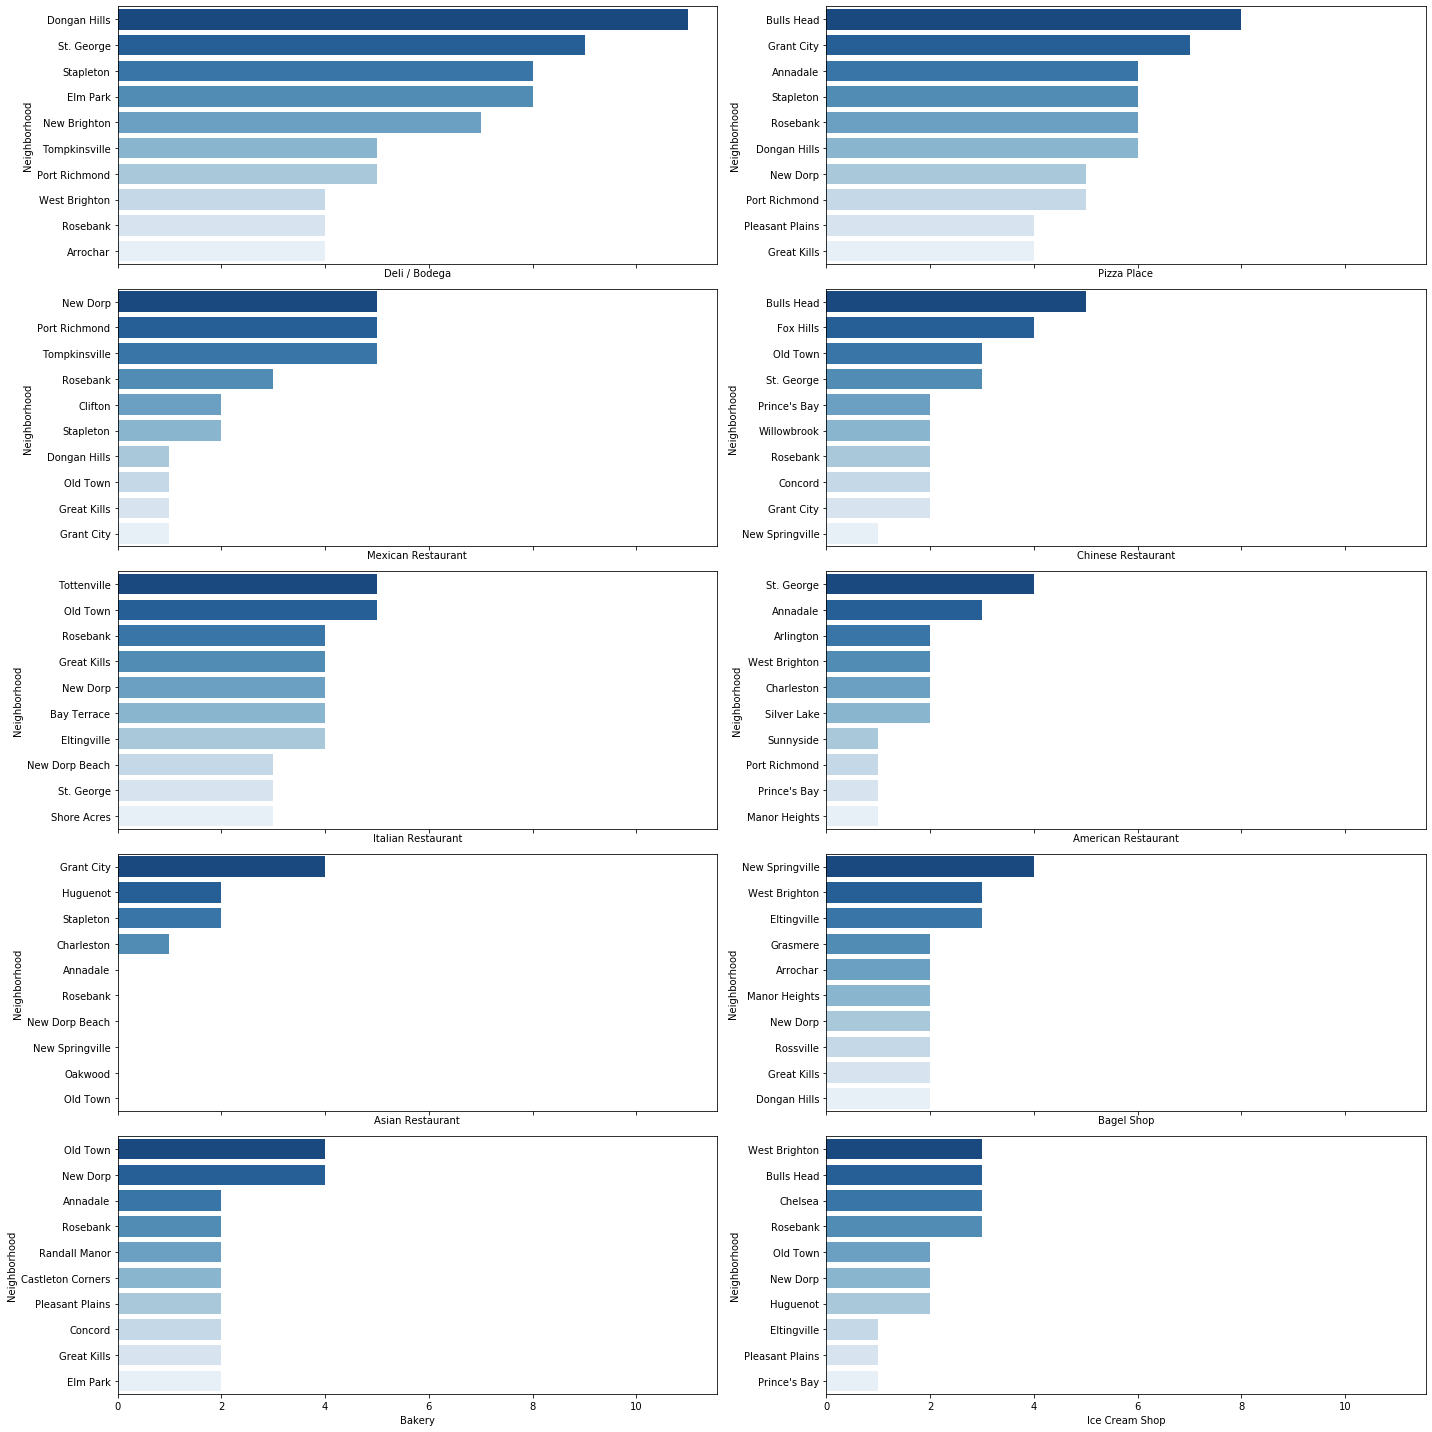

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

venue_top10_list = venue_top10.index.values.tolist()

fig, axes =plt.subplots(5, 2, figsize=(20,20), sharex=True)
axes = axes.flatten()

for ax, category in zip(axes, venue_top10_list):
    data = venue_counts[[category]].sort_values([category], ascending=False)[0:10]
    pal = sns.color_palette("Blues", len(data))
    sns.barplot(x=category, y=data.index, data=data, ax=ax, palette=np.array(pal[::-1]))

plt.tight_layout()
plt.show();

Group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [49]:
SI_grouped = SI_onehot.groupby('Neighborhood').mean().reset_index()
SI_grouped.head()

Neighborhood  African Restaurant  American Restaurant  Asian Restaurant  \
0       Annadale                 0.0             0.200000               0.0   
1  Arden Heights                 0.0             0.000000               0.0   
2      Arlington                 0.0             0.333333               0.0   
3       Arrochar                 0.0             0.000000               0.0   
4    Bay Terrace                 0.0             0.000000               0.0   

   BBQ Joint  Bagel Shop    Bakery  Bar  Bistro  Breakfast Spot  \
0        0.0    0.066667  0.133333  0.0     0.0             0.0   
1        0.0    0.000000  0.000000  0.0     0.0             0.0   
2        0.0    0.000000  0.000000  0.0     0.0             0.0   
3        0.0    0.111111  0.000000  0.0     0.0             0.0   
4        0.0    0.000000  0.000000  0.0     0.0             0.0   

   Bubble Tea Shop  Burger Joint  Burrito Place  Cajun / Creole Restaurant  \
0              0.0           0.0            0.0                        0.0   
1              0.0           0.0            0.0                        0.0   
2              0.0           0.0            0.0                        0.0   
3              0.0           0.0            0.0                        0.0   
4              0.0           0.0            0.0                        0.0   

   Caribbean Restaurant  Chinese Restaurant  Comfort Food Restaurant  \
0              0.000000            0.000000                      0.0   
1              0.000000            0.000000                      0.0   
2              0.166667            0.000000                      0.0   
3              0.000000            0.055556                      0.0   
4              0.000000            0.000000                      0.0   

   Convenience Store  Deli / Bodega  Dessert Shop  Dim Sum Restaurant  \
0                0.0       0.066667           0.0                 0.0   
1                0.0       0.500000           0.0                 0.0   
2                0.0       0.166667           0.0                 0.0   
3                0.0       0.222222           0.0                 0.0   
4                0.0       0.111111           0.0                 0.0   

      Diner  Donut Shop  Eastern European Restaurant  Empanada Restaurant  \
0  0.066667    0.000000                          0.0                  0.0   
1  0.000000    0.000000                          0.0                  0.0   
2  0.000000    0.000000                          0.0                  0.0   
3  0.000000    0.000000                          0.0                  0.0   
4  0.000000    0.111111                          0.0                  0.0   

   Falafel Restaurant  Fast Food Restaurant  Filipino Restaurant  \
0                 0.0                   0.0                  0.0   
1                 0.0                   0.0                  0.0   
2                 0.0                   0.0                  0.0   
3                 0.0                   0.0                  0.0   
4                 0.0                   0.0                  0.0   

   Fish & Chips Shop  Food Truck  French Restaurant  Fried Chicken Joint  \
0                0.0    0.000000           0.000000                  0.0   
1                0.0    0.000000           0.000000                  0.0   
2                0.0    0.000000           0.000000                  0.0   
3                0.0    0.166667           0.000000                  0.0   
4                0.0    0.000000           0.111111                  0.0   

   Frozen Yogurt Shop  Gastropub  Gluten-free Restaurant  Gourmet Shop  \
0                 0.0        0.0                     0.0           0.0   
1                 0.0        0.0                     0.0           0.0   
2                 0.0        0.0                     0.0           0.0   
3                 0.0        0.0                     0.0           0.0   
4                 0.0        0.0                     0.0           0.0   

   Greek Re

In [50]:
# function to sort venues in descending order

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Create the new dataframe and display the top 5 venues for each neighborhood.

In [51]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))    

In [52]:
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = SI_grouped['Neighborhood']

for ind in np.arange(SI_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(SI_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0       Annadale           Pizza Place   American Restaurant   
1  Arden Heights         Deli / Bodega           Pizza Place   
2      Arlington   American Restaurant           Pizza Place   
3       Arrochar           Pizza Place         Deli / Bodega   
4    Bay Terrace    Italian Restaurant           Pizza Place   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  
0                Bakery                 Diner      Sushi Restaurant  
1    Dim Sum Restaurant                 Diner            Donut Shop  
2  Caribbean Restaurant         Deli / Bodega   Peruvian Restaurant  
3            Food Truck            Bagel Shop    Italian Restaurant  
4     French Restaurant            Donut Shop         Deli / Bodega

## Cluster Neighborhoods

Run k-means to count Neighborhoods for each cluster label for variable cluster size

In [53]:
SI_grouped_clustering = SI_grouped.drop('Neighborhood', 1)


Determine the optimal number of clusters for k-means clustering

The Elbow Method - calculate the sum of squared distances of samples to their closest cluster center for different values of k. The value of k after which there is no siginificant decrease in sum of squared distances is choosen.

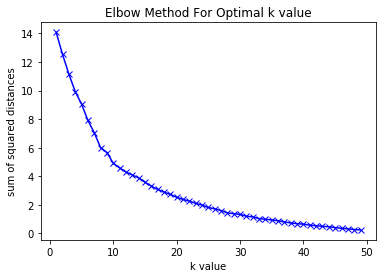

In [54]:
sum_of_squared_distances = []
K = range(1,50)
for k in K:
    kmeans = KMeans(n_clusters=k).fit(SI_grouped_clustering)
    sum_of_squared_distances.append(kmeans.inertia_)

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k value')
plt.ylabel('sum of squared distances')
plt.title('Elbow Method For Optimal k value');

There seems to be a slight bend at 9, but confirm this with Silhouette Method. 

2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 

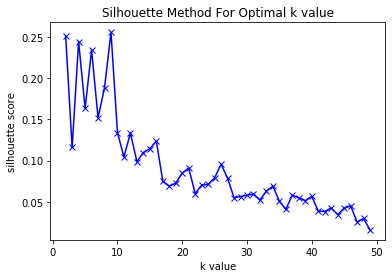

In [55]:
from sklearn.metrics import silhouette_score

sil = []
K_sil = range(2,50) # minimum 2 clusters required, to define dissimilarity

for k in K_sil:
    print(k, end=' ')
    kmeans = KMeans(n_clusters = k).fit(SI_grouped_clustering)
    labels = kmeans.labels_
    sil.append(silhouette_score(SI_grouped_clustering, labels, metric = 'euclidean'))

plt.plot(K_sil, sil, 'bx-')
plt.xlabel('k value')
plt.ylabel('silhouette score')
plt.title('Silhouette Method For Optimal k value')
plt.show()

There is a peak at k = 2,4,6 & 9. Since Elbow method also gave a result of 9 as best value, use 9 clusters

In [56]:
kclusters = 9

# run k-means clustering
kmeans = KMeans(init="k-means++", n_clusters=kclusters, n_init=50).fit(SI_grouped_clustering)

print(Counter(kmeans.labels_))

Counter({0: 41, 4: 5, 8: 4, 1: 2, 3: 2, 7: 2, 6: 1, 2: 1, 5: 1})


Create a new dataframe that includes the cluster as well as the top 5 venues for each neighborhood.

In [57]:
# add clustering labels
try:
    neighborhoods_venues_sorted.drop('Cluster Labels', axis=1)
except:
    neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

neighborhoods_venues_sorted.head(5)

Cluster Labels   Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0               0       Annadale           Pizza Place   American Restaurant   
1               8  Arden Heights         Deli / Bodega           Pizza Place   
2               0      Arlington   American Restaurant           Pizza Place   
3               0       Arrochar           Pizza Place         Deli / Bodega   
4               4    Bay Terrace    Italian Restaurant           Pizza Place   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  
0                Bakery                 Diner      Sushi Restaurant  
1    Dim Sum Restaurant                 Diner            Donut Shop  
2  Caribbean Restaurant         Deli / Bodega   Peruvian Restaurant  
3            Food Truck            Bagel Shop    Italian Restaurant  
4     French Restaurant            Donut Shop         Deli / Bodega

In [58]:
# merge neighborhoods_venues_sorted with SI_data to add latitude/longitude for each neighborhood
SI_merged = neighborhoods_venues_sorted.join(SI_neighborhoods.set_index('Neighborhood'), on='Neighborhood')
SI_merged.head()

Cluster Labels   Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0               0       Annadale           Pizza Place   American Restaurant   
1               8  Arden Heights         Deli / Bodega           Pizza Place   
2               0      Arlington   American Restaurant           Pizza Place   
3               0       Arrochar           Pizza Place         Deli / Bodega   
4               4    Bay Terrace    Italian Restaurant           Pizza Place   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0                Bakery                 Diner      Sushi Restaurant   
1    Dim Sum Restaurant                 Diner            Donut Shop   
2  Caribbean Restaurant         Deli / Bodega   Peruvian Restaurant   
3            Food Truck            Bagel Shop    Italian Restaurant   
4     French Restaurant            Donut Shop         Deli / Bodega   

         Borough   Latitude  Longitude  
0  Staten Island  40.538114 -74.178549  
1  Staten Island  40.549286 -74.185887  
2  Staten Island  40.635325 -74.165104  
3  Staten Island  40.596313 -74.067124  
4  Staten Island  40.553988 -74.139166

Visualize the resulting clusters

In [59]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
colors_array = cm.rainbow(np.linspace(0, 1, kclusters))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(SI_merged['Latitude'], SI_merged['Longitude'], SI_merged['Neighborhood'], SI_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Results

### Cluster 0

In [62]:
cluster_0 = SI_merged.loc[SI_merged['Cluster Labels'] == 0, SI_merged.columns[1:10]]
cluster_0.head(5)

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0           Annadale           Pizza Place   American Restaurant   
2          Arlington   American Restaurant           Pizza Place   
3           Arrochar           Pizza Place         Deli / Bodega   
5         Bulls Head           Pizza Place    Chinese Restaurant   
7  Castleton Corners         Deli / Bodega    Italian Restaurant   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0                Bakery                 Diner      Sushi Restaurant   
2  Caribbean Restaurant         Deli / Bodega   Peruvian Restaurant   
3            Food Truck            Bagel Shop    Italian Restaurant   
5        Ice Cream Shop         Deli / Bodega            Food Truck   
7           Pizza Place                Bakery          Burger Joint   

         Borough   Latitude  Longitude  
0  Staten Island  40.538114 -74.178549  
2  Staten Island  40.635325 -74.165104  
3  Staten Island  40.596313 -74.067124  
5  Staten Island  40.609592 -74.159409  
7  Staten Island  40.613336 -74.119181

In [73]:
required_column_indices = [2,1]
required_column = [list(SI_merged.columns.values)[i] for i in required_column_indices]
required_column

['1st Most Common Venue', 'Neighborhood']

In [74]:
separator = '*'*50
for col in required_column:
    print(cluster_0[col].value_counts(ascending = False))
    print(separator)

Pizza Place            14
Deli / Bodega          14
Italian Restaurant      3
Bagel Shop              2
Diner                   1
Greek Restaurant        1
Donut Shop              1
Sushi Restaurant        1
Ice Cream Shop          1
Fish & Chips Shop       1
American Restaurant     1
Chinese Restaurant      1
Name: 1st Most Common Venue, dtype: int64
**************************************************
Sandy Ground         1
Westerleigh          1
New Springville      1
West Brighton        1
Arlington            1
Willowbrook          1
New Dorp             1
Prince's Bay         1
Stapleton            1
Rossville            1
Great Kills          1
Pleasant Plains      1
Mariner's Harbor     1
Clifton              1
Arrochar             1
Castleton Corners    1
Bulls Head           1
Greenridge           1
Concord              1
Chelsea              1
Grymes Hill          1
Grant City           1
Manor Heights        1
Charleston           1
Shore Acres          1
Woodrow             

### Cluster 1

In [79]:
cluster_1 = SI_merged.loc[SI_merged['Cluster Labels'] == 1, SI_merged.columns[1:10]]
cluster_1.head(5)

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
6   Butler Manor     Convenience Store             BBQ Joint   
35       Oakwood             BBQ Joint           Wings Joint   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
6            Wings Joint     Fish & Chips Shop            Donut Shop   
35     Fish & Chips Shop                 Diner            Donut Shop   

          Borough   Latitude  Longitude  
6   Staten Island  40.506082 -74.229504  
35  Staten Island  40.558462 -74.121566

In [76]:
for col in required_column:
    print(cluster_1[col].value_counts(ascending = False))
    print(separator)

Convenience Store    1
BBQ Joint            1
Name: 1st Most Common Venue, dtype: int64
**************************************************
Oakwood         1
Butler Manor    1
Name: Neighborhood, dtype: int64
**************************************************


### Cluster 2

In [80]:
cluster_2 = SI_merged.loc[SI_merged['Cluster Labels'] == 2, SI_merged.columns[1:10]]
cluster_2.head(5)

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
18  Graniteville        Sandwich Place           Wings Joint   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
18  Fast Food Restaurant    Dim Sum Restaurant                 Diner   

          Borough   Latitude  Longitude  
18  Staten Island  40.620172 -74.153152

In [78]:
for col in required_column:
    print(cluster_2[col].value_counts(ascending = False))
    print(separator)

Sandwich Place    1
Name: 1st Most Common Venue, dtype: int64
**************************************************
Graniteville    1
Name: Neighborhood, dtype: int64
**************************************************


### Cluster 3

In [81]:
cluster_3 = SI_merged.loc[SI_merged['Cluster Labels'] == 3, SI_merged.columns[1:10]]
cluster_3.head(5)

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
13    Egbertville            Bagel Shop    Italian Restaurant   
41  Richmond Town            Bagel Shop           Wings Joint   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
13           Wings Joint   Filipino Restaurant                 Diner   
41     Fish & Chips Shop                 Diner            Donut Shop   

          Borough   Latitude  Longitude  
13  Staten Island  40.579119 -74.127272  
41  Staten Island  40.569606 -74.134057

In [82]:
for col in required_column:
    print(cluster_3[col].value_counts(ascending = False))
    print(separator)

Bagel Shop    2
Name: 1st Most Common Venue, dtype: int64
**************************************************
Richmond Town    1
Egbertville      1
Name: Neighborhood, dtype: int64
**************************************************


### Cluster 4

In [83]:
cluster_4 = SI_merged.loc[SI_merged['Cluster Labels'] == 4, SI_merged.columns[1:10]]
cluster_4.head(5)

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
4       Bay Terrace    Italian Restaurant           Pizza Place   
25     Howland Hook    Italian Restaurant           Wings Joint   
27  Lighthouse Hill                Bakery    Italian Restaurant   
33   New Dorp Beach    Italian Restaurant         Deli / Bodega   
53      Tottenville    Italian Restaurant         Deli / Bodega   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
4      French Restaurant            Donut Shop         Deli / Bodega   
25   Filipino Restaurant                 Diner            Donut Shop   
27           Wings Joint   Filipino Restaurant                 Diner   
33           Pizza Place                 Diner             BBQ Joint   
53   American Restaurant        Sandwich Place    Mexican Restaurant   

          Borough   Latitude  Longitude  
4   Staten Island  40.553988 -74.139166  
25  Staten Island  40.638433 -74.186223  
27  Staten Island  40.576506 -74.137927  
33  Staten Island  40.564255 -74.104327  
53  Staten Island  40.505334 -74.246569

In [84]:
for col in required_column:
    print(cluster_4[col].value_counts(ascending = False))
    print(separator)

Italian Restaurant    4
Bakery                1
Name: 1st Most Common Venue, dtype: int64
**************************************************
New Dorp Beach     1
Lighthouse Hill    1
Howland Hook       1
Bay Terrace        1
Tottenville        1
Name: Neighborhood, dtype: int64
**************************************************


### Cluster 5

In [85]:
cluster_5 = SI_merged.loc[SI_merged['Cluster Labels'] == 5, SI_merged.columns[1:10]]
cluster_5.head(5)

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
24  Heartland Village            Food Truck           Wings Joint   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
24   Filipino Restaurant                 Diner            Donut Shop   

          Borough   Latitude  Longitude  
24  Staten Island  40.589139 -74.159022

In [86]:
for col in required_column:
    print(cluster_5[col].value_counts(ascending = False))
    print(separator)

Food Truck    1
Name: 1st Most Common Venue, dtype: int64
**************************************************
Heartland Village    1
Name: Neighborhood, dtype: int64
**************************************************


### Cluster 6

In [87]:
cluster_6 = SI_merged.loc[SI_merged['Cluster Labels'] == 6, SI_merged.columns[1:10]]
cluster_6.head(5)

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
16  Emerson Hill                Bistro           Wings Joint   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
16     Fish & Chips Shop                 Diner            Donut Shop   

          Borough   Latitude  Longitude  
16  Staten Island  40.606794 -74.097762

In [88]:
for col in required_column:
    print(cluster_6[col].value_counts(ascending = False))
    print(separator)

Bistro    1
Name: 1st Most Common Venue, dtype: int64
**************************************************
Emerson Hill    1
Name: Neighborhood, dtype: int64
**************************************************


### Cluster 7

In [89]:
cluster_7 = SI_merged.loc[SI_merged['Cluster Labels'] == 7, SI_merged.columns[1:10]]
cluster_7.head(5)

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
47  Silver Lake   American Restaurant          Burger Joint   
51    Sunnyside         Grocery Store   American Restaurant   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
47           Wings Joint     Fish & Chips Shop            Donut Shop   
51                Bistro     Fish & Chips Shop            Donut Shop   

          Borough   Latitude  Longitude  
47  Staten Island  40.619193 -74.096290  
51  Staten Island  40.612760 -74.097126

In [90]:
for col in required_column:
    print(cluster_7[col].value_counts(ascending = False))
    print(separator)

Grocery Store          1
American Restaurant    1
Name: 1st Most Common Venue, dtype: int64
**************************************************
Silver Lake    1
Sunnyside      1
Name: Neighborhood, dtype: int64
**************************************************


### Cluster 8

In [91]:
cluster_8 = SI_merged.loc[SI_merged['Cluster Labels'] == 8, SI_merged.columns[1:10]]
cluster_8.head(5)

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
1   Arden Heights         Deli / Bodega           Pizza Place   
30  Midland Beach         Deli / Bodega           Pizza Place   
31   New Brighton         Deli / Bodega    Chinese Restaurant   
48    South Beach         Deli / Bodega          Dessert Shop   

   3rd Most Common Venue 4th Most Common Venue        5th Most Common Venue  \
1     Dim Sum Restaurant                 Diner                   Donut Shop   
30    Chinese Restaurant          Dessert Shop           Frozen Yogurt Shop   
31           Pizza Place  Fast Food Restaurant           Dim Sum Restaurant   
48                 Diner            Donut Shop  Eastern European Restaurant   

          Borough   Latitude  Longitude  
1   Staten Island  40.549286 -74.185887  
30  Staten Island  40.573527 -74.093483  
31  Staten Island  40.640615 -74.087017  
48  Staten Island  40.580247 -74.079553

In [92]:
for col in required_column:
    print(cluster_8[col].value_counts(ascending = False))
    print(separator)

Deli / Bodega    4
Name: 1st Most Common Venue, dtype: int64
**************************************************
Arden Heights    1
New Brighton     1
Midland Beach    1
South Beach      1
Name: Neighborhood, dtype: int64
**************************************************
